<a href="https://colab.research.google.com/github/pavi-ninjaac/Specrom_Analysis/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
#import the libraries
import pandas as pd
import numpy as np
import os
import time
import json

#from visualization
import seaborn as sns
import matplotlib.pyplot as plt


In [70]:
!pip install fasttext

In [71]:
import fasttext

In [72]:
"""from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive"""

"from google.colab import drive\ndrive.mount('/gdrive')\n%cd /gdrive"

In [73]:
# load the data files
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataFiles/111778997-2020-12-23.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataFiles/395563332-2020-12-24.csv')
print("The size of the dataset 1---->",df1.shape)
print("The size of the dataset 2---->",df2.shape)

The size of the dataset 1----> (49350, 13)
The size of the dataset 2----> (138448, 13)


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [74]:
#add those to dataframe into one using the pandas append method
data = df1.append(df2 , ignore_index = True)
print("The shape of the whole dataset--->",data.shape)

The shape of the whole dataset---> (187798, 13)


In [75]:
# columns 
columns = data.columns
print(columns)

Index(['author', 'crawl_date', 'crawl_desc', 'crawl_url', 'date',
       'description', 'full_text', 'img_url', 'site_name', 'title', 'topic',
       'url', 'webpage_source'],
      dtype='object')


### Find the Dublicate based on the 'title' column and remve the dublicate (dedublication)

In [76]:
# find the dublicate using the dublicate function in pandas
dublicate = data[data.duplicated('title')]
print("the number of deblicated samples in the dataset-->",len(dublicate))

the number of deblicated samples in the dataset--> 104956


In [77]:
#removing the dublicates from the dataset

data2 = data[~data.duplicated('title')]
print("The shape of the Resultant dataset----->",data2.shape)

The shape of the Resultant dataset-----> (82842, 13)


#### remove null values 

In [78]:
print("The shape of the  dataset before dropna----->",data2.shape)
data2 = data2.dropna(subset = ['full_text'])
print("The shape of the  dataset after dropna----->",data2.shape)
data2.head()

The shape of the  dataset before dropna-----> (82842, 13)
The shape of the  dataset after dropna-----> (36619, 13)


,author,crawl_date,crawl_desc,crawl_url,date,description,full_text,img_url,site_name,title,topic,url,webpage_source
0,[],2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,2018 champion Rob Cross became the highest-pro...,Watch live coverage of the last two sessions ...,https://e2.365dm.com/20/12/1600x900/skysports-...,Sky Sports,"PDC World Darts Championship, 2020/21: Dirk va...",sport,https://www.skysports.com/darts/news/12288/121...,skysports.com
4,"[""Liz Josaitis, Michigan State University Exte...",2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,The Food and Drug Administration has offered a...,A few examples include the offering of anti-a...,https://www.westernjournal.com/wp-content/uplo...,The Western Journal,"Health Scammers Prey on the Elderly, Here's Ho...",politics,https://www.westernjournal.com/health-scammers...,westernjournal.com
6,"[""Aja Styles""]",2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,Perth mother Clare has found herself mostly co...,Perth mother Clare* has found herself mostly ...,https://static.ffx.io/images/$zoom_0.3431%2C$m...,Brisbane Times,'Pack Lego': Perth family caught in hard borde...,entertainment,https://www.brisbanetimes.com.au/national/west...,brisbanetimes.com.au
8,[],2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,Jonny Evans joined Leicester from West Brom in...,Africa Cup of Nations Jonny Evans joined Leic...,https://e0.365dm.com/20/12/768x432/skysports-j...,Sky Sports,Jonny Evans 'close' to signing new Leicester c...,sport,https://www.skysports.com/football/news/11712/...,skysports.com
11,"[""Jake Johnson""]",2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,The billâs gifts to the wealthy underscore t...,In late-night votes just hours after nearly 5...,https://truthout.org/wp-content/uploads/2020/1...,Truthout,Congress Passes COVID Relief With Billions in ...,politics,https://truthout.org/articles/congress-passes-...,truthout.org


## Remove Newline charecter in 'full_text'
otherwise make error in fattext language detection
error-----> '  predict processes one line at a time (remove '\n') '

In [79]:
#remove newline charecter 
#helper function
def clean_fulltext(text):
  text = text.lower()
  text = text.replace('\n',' ')
  return text

print(clean_fulltext('hi iam Mehana \n from the new chareter'))

hi iam mehana   from the new chareter


In [80]:
data2['full_text'] = data2.apply(lambda row : clean_fulltext(row['full_text']) , axis = 1)
data2.head(4)

,author,crawl_date,crawl_desc,crawl_url,date,description,full_text,img_url,site_name,title,topic,url,webpage_source
0,[],2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,2018 champion Rob Cross became the highest-pro...,watch live coverage of the last two sessions ...,https://e2.365dm.com/20/12/1600x900/skysports-...,Sky Sports,"PDC World Darts Championship, 2020/21: Dirk va...",sport,https://www.skysports.com/darts/news/12288/121...,skysports.com
4,"[""Liz Josaitis, Michigan State University Exte...",2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,The Food and Drug Administration has offered a...,a few examples include the offering of anti-a...,https://www.westernjournal.com/wp-content/uplo...,The Western Journal,"Health Scammers Prey on the Elderly, Here's Ho...",politics,https://www.westernjournal.com/health-scammers...,westernjournal.com
6,"[""Aja Styles""]",2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,Perth mother Clare has found herself mostly co...,perth mother clare* has found herself mostly ...,https://static.ffx.io/images/$zoom_0.3431%2C$m...,Brisbane Times,'Pack Lego': Perth family caught in hard borde...,entertainment,https://www.brisbanetimes.com.au/national/west...,brisbanetimes.com.au
8,[],2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,Jonny Evans joined Leicester from West Brom in...,africa cup of nations jonny evans joined leic...,https://e0.365dm.com/20/12/768x432/skysports-j...,Sky Sports,Jonny Evans 'close' to signing new Leicester c...,sport,https://www.skysports.com/football/news/11712/...,skysports.com


### Detect the Language using the fasttext

In [81]:
# need to extract the language on the basis of full_text
# Here I am using the fasttext to detect the language , more words will give more accurate result

import fasttext

pretrained_model_facebook_path = '/content/drive/MyDrive/Colab Notebooks/dataFiles/lid.176.bin' #store some where in your local machine and use it
model = fasttext.load_model(pretrained_model_facebook_path)
#helper function
def lang_detect(text):
  result = model.predict(text,1)
  return result[0][0][-2:]

lang_detect('hello')

'en'

In [82]:
data2['language'] = data2.apply(lambda row : lang_detect(row['full_text']) , axis = 1)
data2.head(5)

,author,crawl_date,crawl_desc,crawl_url,date,description,full_text,img_url,site_name,title,topic,url,webpage_source,language
0,[],2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,2018 champion Rob Cross became the highest-pro...,watch live coverage of the last two sessions ...,https://e2.365dm.com/20/12/1600x900/skysports-...,Sky Sports,"PDC World Darts Championship, 2020/21: Dirk va...",sport,https://www.skysports.com/darts/news/12288/121...,skysports.com,en
4,"[""Liz Josaitis, Michigan State University Exte...",2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,The Food and Drug Administration has offered a...,a few examples include the offering of anti-a...,https://www.westernjournal.com/wp-content/uplo...,The Western Journal,"Health Scammers Prey on the Elderly, Here's Ho...",politics,https://www.westernjournal.com/health-scammers...,westernjournal.com,en
6,"[""Aja Styles""]",2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,Perth mother Clare has found herself mostly co...,perth mother clare* has found herself mostly ...,https://static.ffx.io/images/$zoom_0.3431%2C$m...,Brisbane Times,'Pack Lego': Perth family caught in hard borde...,entertainment,https://www.brisbanetimes.com.au/national/west...,brisbanetimes.com.au,en
8,[],2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,Jonny Evans joined Leicester from West Brom in...,africa cup of nations jonny evans joined leic...,https://e0.365dm.com/20/12/768x432/skysports-j...,Sky Sports,Jonny Evans 'close' to signing new Leicester c...,sport,https://www.skysports.com/football/news/11712/...,skysports.com,en
11,"[""Jake Johnson""]",2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,The billâs gifts to the wealthy underscore t...,in late-night votes just hours after nearly 5...,https://truthout.org/wp-content/uploads/2020/1...,Truthout,Congress Passes COVID Relief With Billions in ...,politics,https://truthout.org/articles/congress-passes-...,truthout.org,en


## Extract only the English lanuage Samples

In [83]:
#keep only the english language samples

data = data2[data2['language'] == 'en']

print("The whole dataset size----->",data2.shape)
print()
print('The English Dataset size--->',data.shape)
print()
print("Other language datas------->",data2.shape[0]-data.shape[0])

The whole dataset size-----> (36619, 14)

The English Dataset size---> (36587, 14)

Other language datas-------> 32


# EDA

In [84]:
#how many categories are there
class_  = data['topic'].value_counts()
class_

business         12320
sport             7607
entertainment     6172
tech              5313
politics          5175
Name: topic, dtype: int64

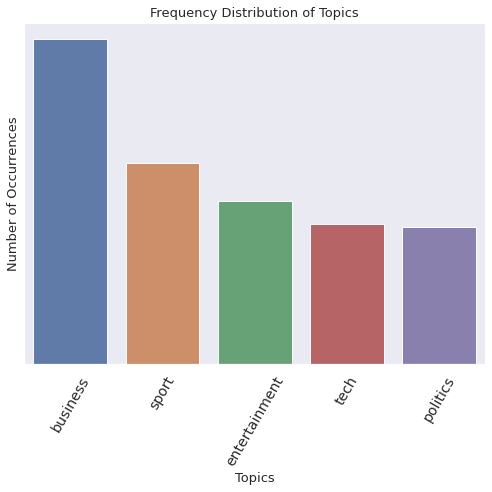

In [85]:
f, axes = plt.subplots(1, 1, figsize=(7, 7), sharex=True)

sns.set(style = 'darkgrid')
sns.barplot(x=class_.index , y = class_.values , alpha=0.95)

plt.title('Frequency Distribution of Topics', fontsize=13)
plt.ylabel('Number of Occurrences', fontsize=13)
plt.xlabel('Topics', fontsize=13)

plt.xticks(rotation=60,fontsize = 14)
plt.yticks([])

plt.tight_layout()
plt.show()


In [86]:
# the details about the source page
source_page_count = data['webpage_source'].value_counts()
top_15_source = source_page_count[:15]
top_15_source

dailymail.co.uk         1512
nasdaq.com              1104
newindianexpress.com     850
yahoo.com                829
indiatimes.com           757
news18.com               617
houstonchronicle.com     572
globenewswire.com        556
hindustantimes.com       525
reuters.com              511
thestreet.com            437
washingtonpost.com       433
cbslocal.com             420
thehindu.com             406
express.co.uk            402
Name: webpage_source, dtype: int64

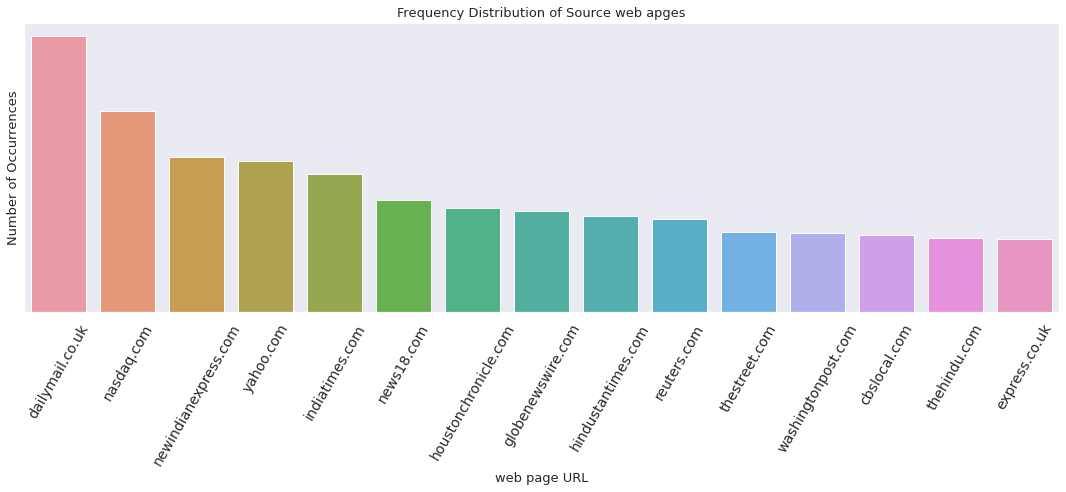

In [87]:
f, axes = plt.subplots(1, 1, figsize=(15, 7), sharex=True)

sns.set(style = 'darkgrid')
sns.barplot(x=top_15_source.index , y = top_15_source.values , alpha=0.95)

plt.title('Frequency Distribution of Source web apges', fontsize=13)
plt.ylabel('Number of Occurrences', fontsize=13)
plt.xlabel('web page URL', fontsize=13)

plt.xticks(rotation=60,fontsize = 14)
plt.yticks([])

plt.tight_layout()
plt.show()

In [88]:
# distribution of site names
site_count = data['site_name'].value_counts()
top_15_site_count = site_count[:15]
top_15_site_count

Mail Online                1512
The New Indian Express      850
News18                      605
HoustonChronicle.com        571
GlobeNewswire News Room     556
The Economic Times          532
U.S.                        478
hindustantimes.com          439
Washington Post             433
TheStreet                   426
Express.co.uk               402
CBSSports.com               394
SFChronicle.com             386
thestar.com                 381
The Sun                     373
Name: site_name, dtype: int64

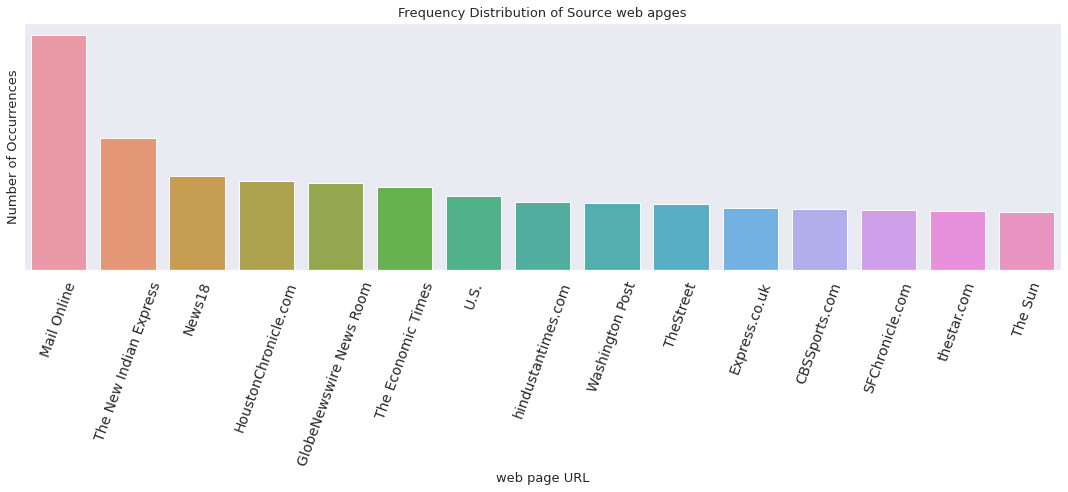

In [89]:
f, axes = plt.subplots(1, 1, figsize=(15, 7), sharex=True)

sns.set(style = 'darkgrid')
sns.barplot(x=top_15_site_count.index , y = top_15_site_count.values , alpha=0.95)

plt.title('Frequency Distribution of Source web apges', fontsize=13)
plt.ylabel('Number of Occurrences', fontsize=13)
plt.xlabel('web page URL', fontsize=13)

plt.xticks(rotation=70,fontsize = 14)
plt.yticks([])

plt.tight_layout()
plt.show()

# Filter out the Data that only contain author name

In [90]:
author_null = data['author']=='[]'
print(author_null)
print()

print("The whole dataset size------------>",data.shape)
data = data[~author_null]

print()
print('The Dataset contain author name--->',data.shape)
print()
print("Dataset contain no author name---->",len(author_null)-data.shape[0])

0          True
4         False
6         False
8          True
11        False
          ...  
187782     True
187787     True
187789     True
187791     True
187796     True
Name: author, Length: 36587, dtype: bool

The whole dataset size------------> (36587, 14)

The Dataset contain author name---> (11793, 14)

Dataset contain no author name----> 24794


In [105]:
# convert the author name json to str
def convert_str(t):
  return json.loads(t)[0]

data['author'] = data.apply(lambda row : convert_str(row['author']) , axis=1)
data.head(4)

,author,crawl_date,crawl_desc,crawl_url,date,description,full_text,img_url,site_name,title,topic,url,webpage_source,language
4,"Liz Josaitis, Michigan State University Extension",2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,The Food and Drug Administration has offered a...,a few examples include the offering of anti-a...,https://www.westernjournal.com/wp-content/uplo...,The Western Journal,"Health Scammers Prey on the Elderly, Here's Ho...",politics,https://www.westernjournal.com/health-scammers...,westernjournal.com,en
6,Aja Styles,2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,Perth mother Clare has found herself mostly co...,perth mother clare* has found herself mostly ...,https://static.ffx.io/images/$zoom_0.3431%2C$m...,Brisbane Times,'Pack Lego': Perth family caught in hard borde...,entertainment,https://www.brisbanetimes.com.au/national/west...,brisbanetimes.com.au,en
11,Jake Johnson,2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,The billâs gifts to the wealthy underscore t...,in late-night votes just hours after nearly 5...,https://truthout.org/wp-content/uploads/2020/1...,Truthout,Congress Passes COVID Relief With Billions in ...,politics,https://truthout.org/articles/congress-passes-...,truthout.org,en
12,Christine Favocci,2020-12-23,news cc-crawl,crawl-data/CC-NEWS/2020/12/CC-NEWS-20201223000...,2020-12-23,It is naive to think that either party is free...,the left has insisted that voter fraud is jus...,https://www.westernjournal.com/wp-content/uplo...,The Western Journal,PA Man Facing Charges of Unlawful Voting After...,tech,https://www.westernjournal.com/pa-man-facing-c...,westernjournal.com,en


# Find the outliers bashed on the author name

In [109]:
# craate author_exclusion  list that excludes some author names that denote outlets and not persons.
# For example, this list should contain "reuters", 'associated press' etc. 
total_author = len(list(data['author'].unique()))
print("The number of district authors in the dataset----->",total_author)

The number of district authors in the dataset-----> 4691
